In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/Shared drives/Math thesis/Data/Quaterly Composite Data.csv'

df = pd.read_csv(file_path)
df = df.set_index('date')
df

,ticker,dimension,datekey,reportperiod,fiscalperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,workingcapital,year,quarter,un_rate,gdp,inflation,fed_fund_rate,volatility_index,hpi,snp_price
date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,FRBK,ARQ,2000-05-15,2000-03-31,2000-Q1,2023-03-15,-7019000,586063000,NaN,NaN,...,NaN,2000,1,4.0,10002.179,2.7,5.68,23.15,230.16,1452.359985
2000-06-30,FRBK,ARQ,2000-08-11,2000-06-30,2000-Q2,2023-03-15,-7079000,613698000,NaN,NaN,...,NaN,2000,2,3.9,10247.720,3.1,6.27,24.92,233.91,1471.839966
2000-09-30,FRBK,ARQ,2000-11-14,2000-09-30,2000-Q3,2023-03-15,-4930000,641269000,NaN,NaN,...,NaN,2000,3,4.0,10318.165,3.7,6.52,19.17,238.18,1382.949951
2000-12-31,FRBK,ARQ,2001-03-23,2000-12-31,2000-Q4,2023-03-15,-2055000,655637000,NaN,NaN,...,NaN,2000,4,3.9,10435.744,3.4,6.47,26.02,241.82,1139.829956
2001-03-31,FRBK,ARQ,2001-05-15,2001-03-31,2001-Q1,2023-03-15,-591000,656271000,NaN,NaN,...,NaN,2001,1,4.2,10470.231,3.7,5.60,25.73,247.81,1249.439941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,UNTY,ARQ,2023-08-08,2023-06-30,2023-Q2,2024-08-06,-3623000,2552301000,NaN,NaN,...,NaN,2023,2,3.6,27453.815,4.9,4.99,16.44,644.13,4499.379883
2023-09-30,UNTY,ARQ,2023-11-08,2023-09-30,2023-Q3,2024-08-06,-3960000,2563006000,NaN,NaN,...,NaN,2023,3,3.7,27967.697,3.2,5.26,15.01,656.36,4382.779785
2023-12-31,UNTY,ARQ,2024-03-07,2023-12-31,2023-Q4,2024-08-06,-2737000,2578507000,NaN,NaN,...,NaN,2023,4,3.7,28296.967,3.2,5.33,15.29,657.83,5157.359863


The data we use above has been extracted from NASDAQ's Sharadar database.

Our dataset consists of quarterly micro econmic data (such as assets, liabilities, debt, etc.) for 13 banks that have failed in history and 13 banks that have not. In addition to this, the dataset also contains macroeconomic data (Unemployement rate, GDP, Inflation rate, Fed fund rate, Volatility index, Housing price index, and S&P Index Price) for the periods we have the data for the banks for.

In [3]:
failed_banks = {'FRBK':"Republic First Bank",
                'CFG':"Citizens Bank",
                'SIVBQ':"Silicon Valley Bank",
                'SICPQ':"Silvergate Bank",
                'GNTY':"Guarantee Bank",
                'FNBCQ':"First NBC Bank",
                'DRLCQ':"Doral Bank",
                'TNCC':"Tennessee Commerce Bank ",
                'CORSQ':"Corus Bank",
                'BKUNQ':"Bank United",
                'DWNFQ':"Downey Savings and Loan Association",
                'WAMUQ':"Washington Mutual",
                'IDMCQ':"IndyMac Bank"}

non_failed_banks = {'GS':"Goldman Sachs",
                    'TFC':"Truist Bank",
                    'JPM':"JPMorgan Chase",
                    'WFC':"Wells Fargo",
                    'BAC':"Bank of America",
                    'COF':"Capital One",
                    'PNC':"PNC Bank",
                    'USB':"US Bankcorp",
                    'HTLF':" Heartland Financial",
                    'WAL':"Western Alliance Bank",
                    'CPF':"Central Pacific Financial",
                    'SNV':"Syovus Financial Corp.",
                    'UNTY':"Unity Bankcorp."}

# list of bank tickers
banks = list(failed_banks.keys()) + list(non_failed_banks.keys())

# Data Pre-processing

### Remove duplicate values

In [4]:
df_clean = pd.DataFrame()

for bank in banks:
    bank_data = df[df['ticker'] == bank]
    bank_cleaned_data = bank_data[~bank_data.index.duplicated(keep='first')]
    df_clean = pd.concat([df_clean, bank_cleaned_data])

### Get the required properties (columns)

Info variables: \
- ticker
- year
- quarter

In [5]:
info_var = ['ticker', 'year', 'quarter']

Key Micro variables: \

Altman Variables (used in calculating Altman's Z-Score):
- assets
- retained earnings
- earnings before interest and taxes (ebit)
- market capital (market value of equity)
- liabilities
- equity

Other micro variables (used in improving model accuracy):
- net income
- debt
- revenue
- stock closing price

In [6]:
altman_var = ['assets', 'retearn', 'ebit', 'marketcap', 'liabilities', 'equity']

other_micro_var = ['netinc', 'debt', 'revenue', 'price']

micro_var = altman_var + other_micro_var

Key Macro Variables:
- unemployement rate (un rate)
- gdp
- inflation
- fed fund rate
- volatility index
- housing price index (hpi)
- S&P index price

In [7]:
macro_var = ['un_rate', 'gdp', 'inflation', 'fed_fund_rate', 'volatility_index', 'hpi', 'snp_price']

In [8]:
# combine the column names together
final_var =  info_var + macro_var + micro_var

data = df_clean[final_var]

### Handling missing values

In [9]:
# get the list of columns that have missing values
columns_with_missing_values = data.columns[data.isnull().any()].tolist()

In [10]:
# fill in the missing values using interpolation for the columns with missing values
for ticker in data['ticker'].unique():
    for column in columns_with_missing_values:
        if data[column].dtype in [np.float64, np.int64]:
            data.loc[data['ticker'] == ticker, column] = data.loc[data['ticker'] == ticker, column].interpolate(method='linear', limit_direction='both')

Interpolation takes the average value (slope) for the missing value considering the available values before and after it

### Adding additional micro variables from the available micro variables


Modified Z-score formula for financial institutions: \
https://finbox.com/NYSE:BAC/explorer/altman_z_score/

Z' = 6.56A + 3.26B + 6.72C + 1.05D + 3.25

A = Working Capital / Total Assets \
B = Retained Earnings / Total Assets \
C = Operating Income / Total Assets \
D = Book Value of Equity / Book Value Of Liabilities

Modified Z-Score thresholds: \
Z' > 2.6 --> Safe Zone \
2.6 > Z' > 1.1 --> Gray Zone \
Z' < 1.1 --> Distress Zone

In [11]:
# modified altman z-score
data['working_capital'] = data['assets'] - data['liabilities']
data['altman_z_score'] = (6.56 * (data['working_capital'] / data['assets']) + #A
                          3.26 * (data['retearn'] / data['assets']) + #B
                          6.72 * (data['netinc'] / data['assets']) + #C
                          1.05 * (data['equity'] / data['liabilities'])) #D

Note: We did not have the data for the current assets for the banks as it was not available in their financial statements. So we had to implement the formula using Total Assets, and hence, in the future computations, we consider the trend of the above calculated Z-score rather than its abosule value and the thresholds.

Other micro variables - used to improve model accuracy
- debt-to-equity ratio = debt / equity
- return on assets (roa) = income / assets
- return on equity (roe) = income / equity

In [12]:
# other variables
data['debt_to_equity'] = data['debt'] / data['equity']
data['roa'] = data['netinc'] / data['assets']
data['roe'] = data['netinc'] / data['equity']

In [13]:
# quarterly percent change in the stock price, s&p index price, and modified altman z-score
updated_data = pd.DataFrame()
for bank in banks:
  bank_data = data[data['ticker'] == bank].copy()

  # bank stock price change %
  bank_data['price_change_%'] = bank_data['price'].pct_change() * 100

  # snp index price change %
  bank_data['snp_change_%'] = bank_data['snp_price'].pct_change() * 100

  # altman score change %
  bank_data['altman_change_%'] = bank_data['altman_z_score'].pct_change() * 100

  updated_data = pd.concat([updated_data, bank_data])

data = updated_data

# Exploratory Data Analysis

### Heatmap (for variable correlations)

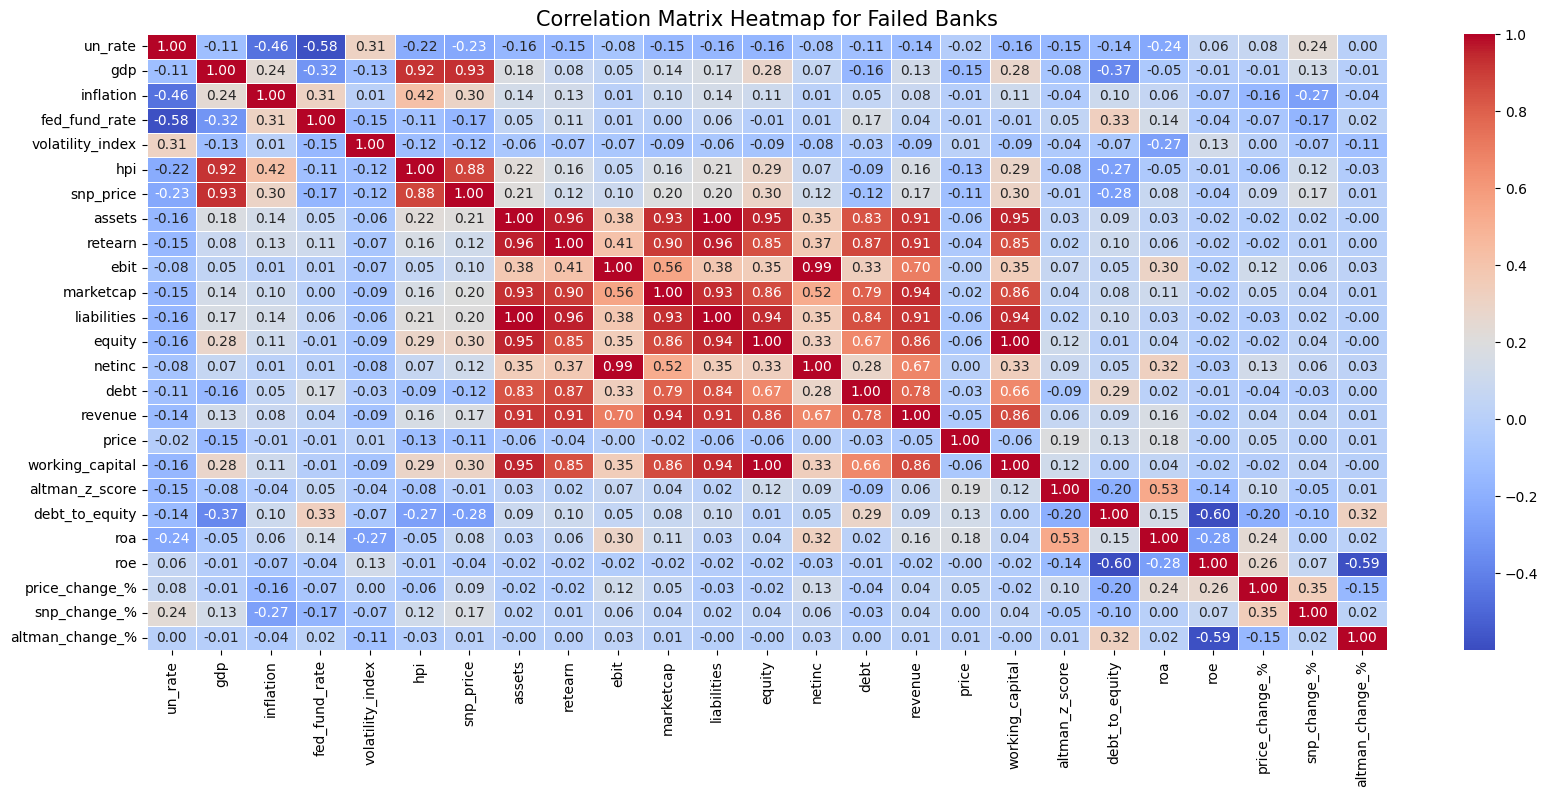

In [14]:
failed_bank_tickers = list(failed_banks.keys())
failed_banks_data = data[data['ticker'].isin(failed_bank_tickers)]

# drop the 'year' and 'quarter' columns, and select only numeric columns
numeric_failed_data = failed_banks_data.drop(columns=['year', 'quarter']).select_dtypes(include=['float64', 'int64'])

# calculate the correlation matrix for the numeric columns
corr_matrix_failed = numeric_failed_data.corr()


plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix_failed, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=corr_matrix_failed.isnull())
plt.title('Correlation Matrix Heatmap for Failed Banks', fontsize=15)
plt.show()

### Stock price % change vs S&P Index price % change plot for failed banks

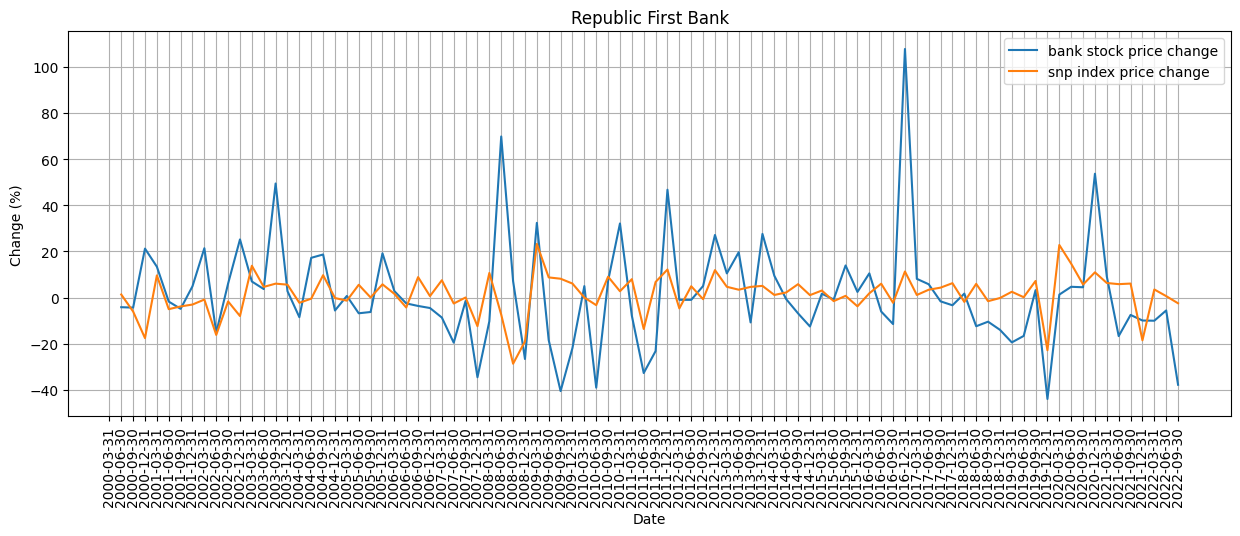

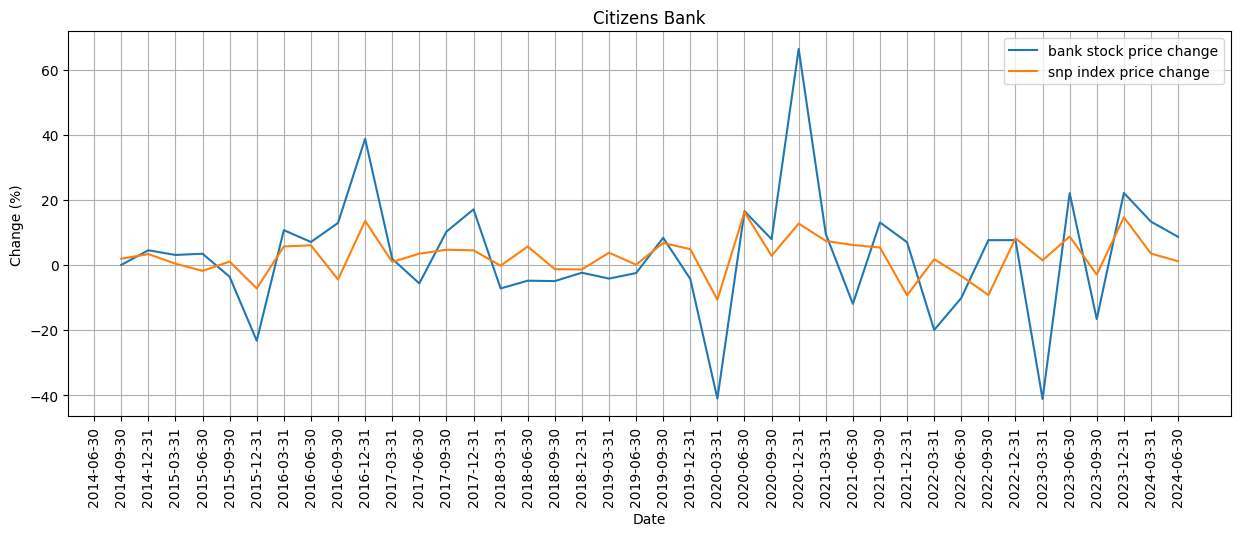

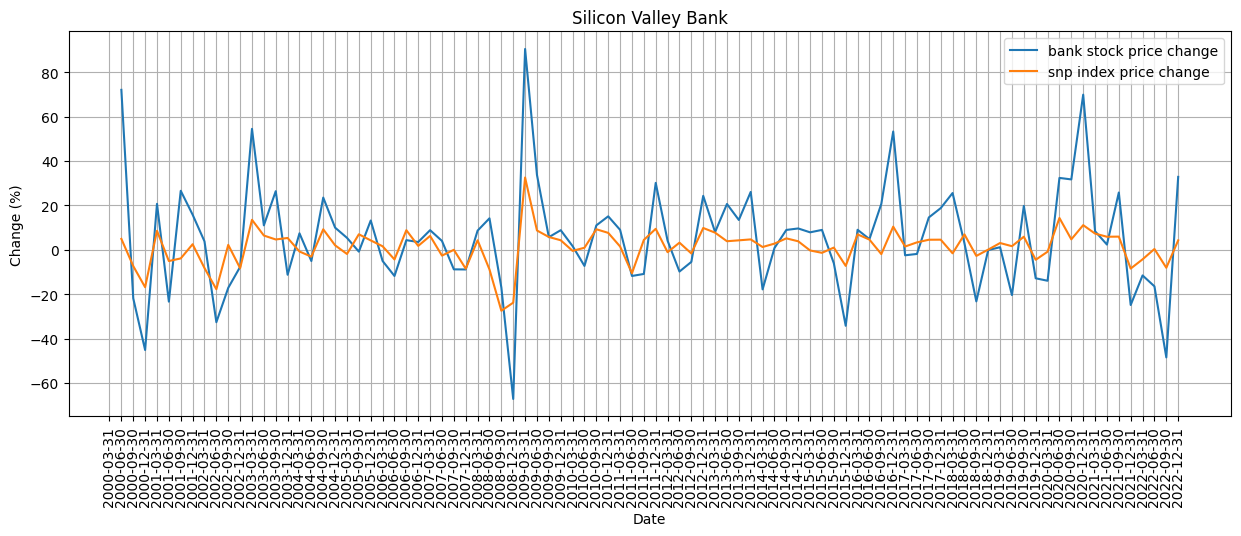

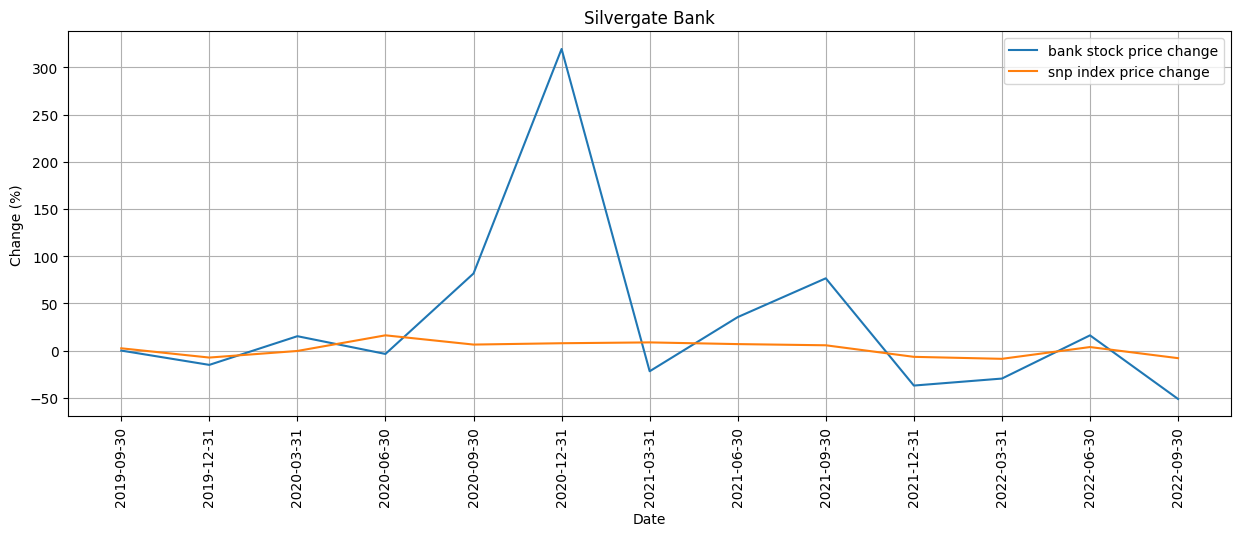

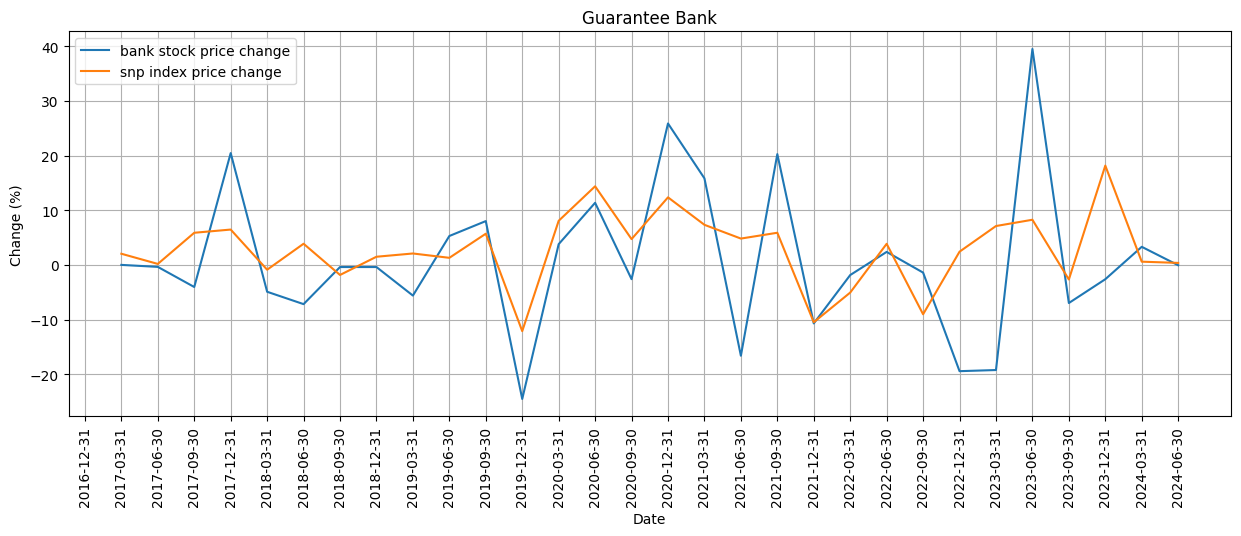

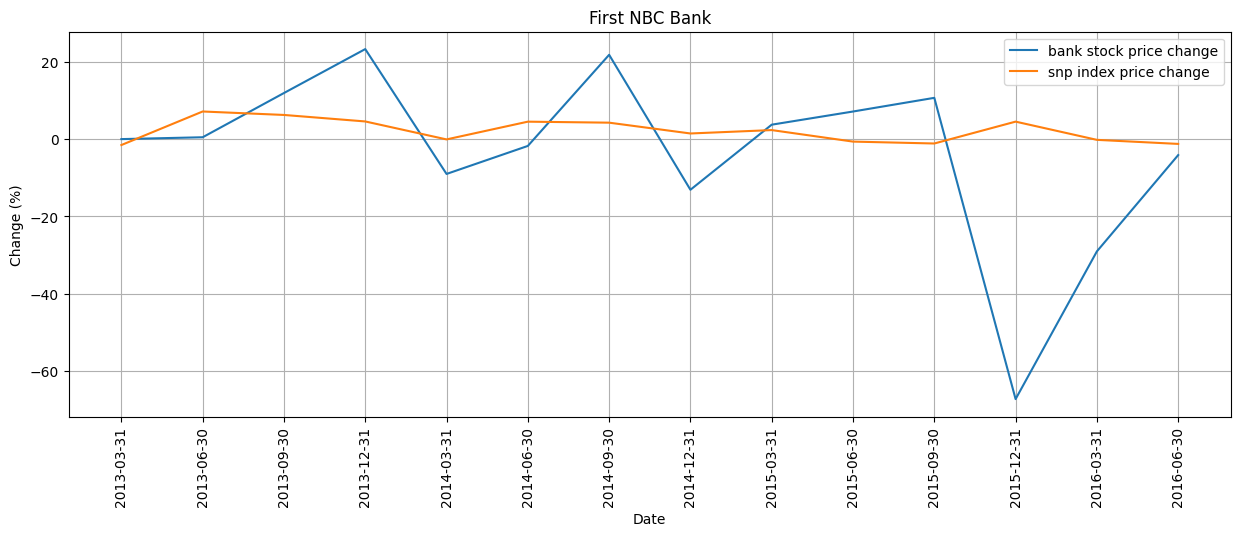

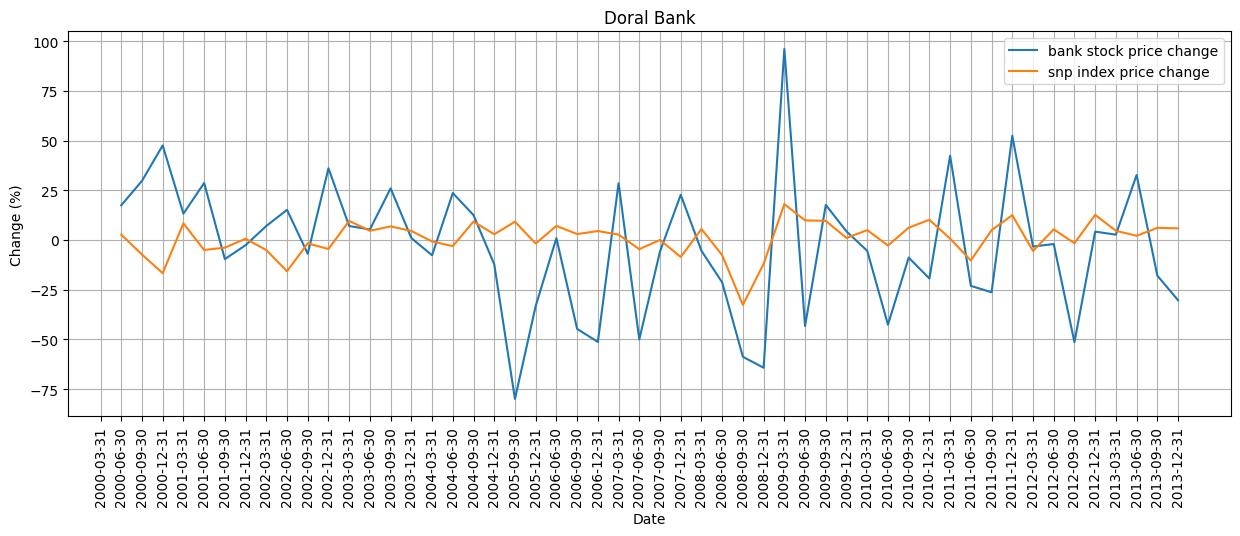

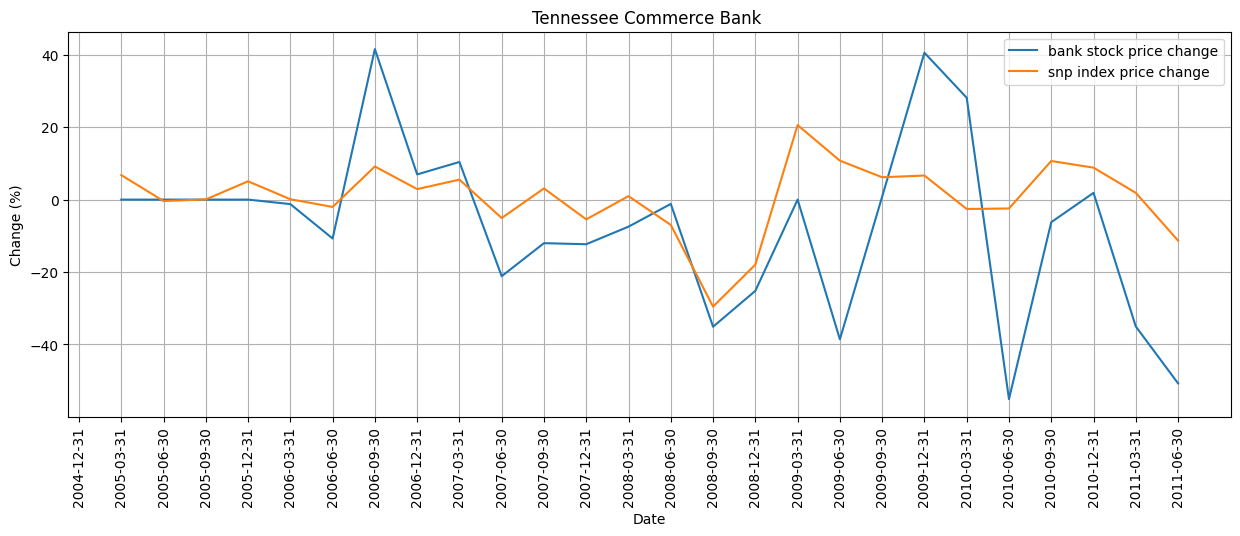

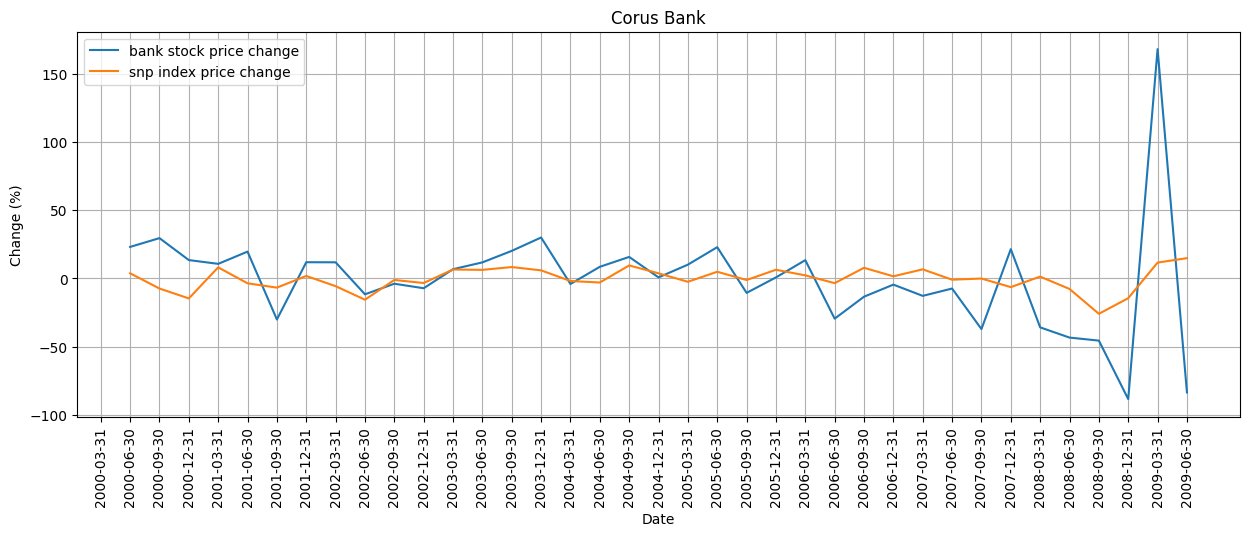

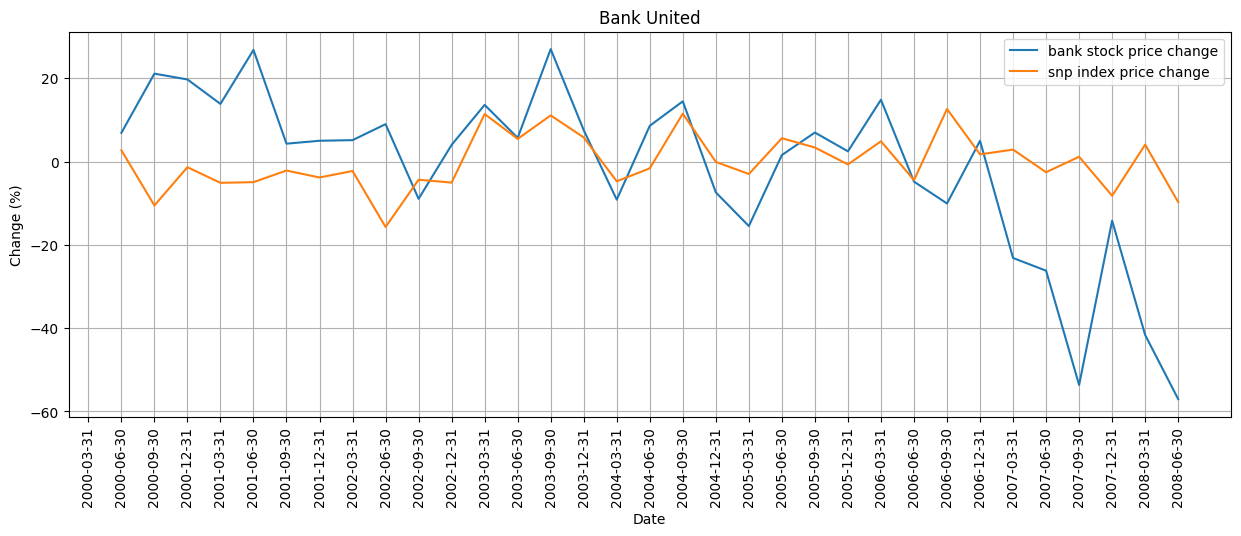

In [ ]:
for bank in failed_banks: #iterate over every bank
    plt.figure(figsize = (15,5))
    temp = data[data["ticker"] == bank]
    plt.plot(temp.index, temp["price_change_%"], label="bank stock price change")
    plt.plot(temp.index, temp["snp_change_%"], label="snp index price change")
    plt.title(failed_banks[bank])
    plt.xlabel("Date")
    plt.ylabel("Change (%)")
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

Modified Altman Z-score plot for failed banks

In [ ]:
for bank in failed_banks: # iterate over every bank
  plt.figure(figsize = (15,5))
  temp = data[data['ticker'] == bank]
  plt.plot(temp.index, temp["altman_z_score"])
  plt.title(failed_banks[bank])
  plt.xlabel("Date")
  plt.ylabel("Change (%)")
  plt.xticks(rotation=90)
  plt.grid()
  plt.show()

# Defining "default"

### Stock-price definiton

In [ ]:
# initialize an empty DataFrame to store results
df = data
updated_df = pd.DataFrame()

# parameters
look_back_period = 8  # number of quarters for long-term change (2 years)
bank_change_threshold = -35 # %
snp_change_threshold = -20 # %

for bank in banks:
    temp = df[df["ticker"] == bank].copy()

    # short-term (1-day) and long-term (look_back_period) stock price percentage changes
    stock_short_term_change = temp['price'].pct_change() * 100
    stock_long_term_change = temp['price'].pct_change(look_back_period) * 100

    # short-term and long-term S&P price percentage changes
    snp_short_term_change = temp['snp_price'].pct_change() * 100
    snp_long_term_change = temp['snp_price'].pct_change(look_back_period) * 100

    # S&P default based on the set thresholds
    snp_default = ((snp_short_term_change < snp_change_threshold) | (snp_long_term_change < snp_change_threshold)).astype(int)

    # bank default based on the set thresholds and S&P conditions
    temp['stock_default'] = (((stock_short_term_change < bank_change_threshold) | (stock_long_term_change < bank_change_threshold)) & (snp_default == 0)).astype(int)

    updated_df = pd.concat([updated_df, temp], ignore_index=False)

df = updated_df

### Altman definition

In [ ]:
# initialize an empty DataFrame to store results
updated_df = pd.DataFrame()

# parameters
sudden_drop_threshold = -20  # % drop to detect a sudden decline
steady_decline_threshold = -40  # %
look_back_period = 4 # number of quarters for long-term change (1 year)

for bank in banks:
    temp = df[df["ticker"] == bank].copy()

    # short-term percentage change in the altman z-score
    altman_short_term_change = temp['altman_z_score'].pct_change() * 100

    # long-term percentage change in the altman z-score
    altman_long_term_change = temp['altman_z_score'].pct_change(periods=look_back_period) * 100

    temp['altman_default'] = ((altman_short_term_change < sudden_drop_threshold) | (altman_long_term_change < steady_decline_threshold)).astype(int)

    updated_df = pd.concat([updated_df, temp], ignore_index=False)

df = updated_df

# Defining target variable "will_fail"

### Stock price target variable

In [ ]:
# initialize an empty DataFrame to store results
updated_df = pd.DataFrame()

# look ahead period of quarters for "prediction" of default
look_ahead_period = 2  # quaters

for bank in banks:
    temp = df[df["ticker"] == bank].copy().reset_index()

    # initialize the 'stock_will_default' column with 0
    temp['stock_will_default'] = 0

    for i in range(len(temp) - 1):  # Exclude the last row
        # check if there is a default in the next two rows
        if i < len(temp) - 1 and temp.iloc[i + 1]['stock_default'] == 1: # check in the next quarter, if it exists
            temp.loc[i, 'stock_will_default'] = 1
        elif i < len(temp) - 2 and temp.iloc[i + 2]['stock_default'] == 1: # check in the next to next quarter, if it exists
            temp.loc[i, 'stock_will_default'] = 1

    temp = temp.set_index('date')

    updated_df = pd.concat([updated_df, temp], ignore_index=False)

df = updated_df

### Altman target variable

In [ ]:
# initialize an empty DataFrame to store results
updated_df = pd.DataFrame()

# look over period of quarters for "prediction" of default
look_ahead_period = 2  # quaters

for bank in banks:
    temp = df[df["ticker"] == bank].copy().reset_index()

    # initialize the 'altman_will_default' column with 0
    temp['altman_will_default'] = 0

    for i in range(len(temp) - 1):  # Exclude the last row
        # check if there is a default in the next two rows
        if i < len(temp) - 1 and temp.iloc[i + 1]['altman_default'] == 1: # check in the next quarter, if it exists
            temp.loc[i, 'altman_will_default'] = 1
        elif i < len(temp) - 2 and temp.iloc[i + 2]['altman_default'] == 1: # check in the next to next quarter, if it exists
            temp.loc[i, 'altman_will_default'] = 1

    temp = temp.set_index('date')

    updated_df = pd.concat([updated_df, temp], ignore_index=False)

df = updated_df

# Modeling

### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

We categorize the tickers so that the model can identify the patters, taking into consideration the banks

In [ ]:
df = df.dropna() # drop all the missing values once (expecially the last rows in the target variable, since there is nothing to predict from)

# Initialize LabelEncoder for the ticker column
ticker_encoder = LabelEncoder()
df['ticker_encoded'] = ticker_encoder.fit_transform(df['ticker'])

# prepare lists to store training and testing data for each bank for both models
train_list_stock_default = []
test_list_stock_default = []
train_list_altman_default = []
test_list_altman_default = []

# loop over each unique ticker (each bank's dataset)
for ticker, bank_df in df.groupby('ticker'):
    # separate features (X)
    X_bank_stock = bank_df.drop(columns=['stock_will_default', 'altman_will_default', 'ticker',
                                         'year', 'quarter', 'altman_z_score', 'stock_default',
                                         'altman_default', 'price_change_%'])
    X_bank_stock['ticker_encoded'] = bank_df['ticker_encoded']  # Add encoded ticker

    X_bank_altman = bank_df.drop(columns=['stock_will_default', 'altman_will_default', 'ticker',
                                          'year', 'quarter', 'altman_z_score', 'stock_default',
                                          'altman_default', 'working_capital', 'assets', 'retearn',
                                          'netinc', 'equity', 'liabilities', 'altman_change_%'])  # also exclude the micro variables used to calculate altman z-score
    X_bank_altman['ticker_encoded'] = bank_df['ticker_encoded']  # Add encoded ticker

    # prepare y for each model
    y_bank_stock = bank_df['stock_will_default']
    y_bank_altman = bank_df['altman_will_default']

    # 80/20 train-test split for each model
    X_train_bank_stock, X_test_bank_stock, y_train_bank_stock, y_test_bank_stock = train_test_split(
        X_bank_stock, y_bank_stock, test_size=0.2, random_state=42)
    X_train_bank_altman, X_test_bank_altman, y_train_bank_altman, y_test_bank_altman = train_test_split(
        X_bank_altman, y_bank_altman, test_size=0.2, random_state=42)

    # combine features and target for both models
    train_list_stock_default.append(pd.DataFrame(X_train_bank_stock).assign(stock_will_default=y_train_bank_stock))
    test_list_stock_default.append(pd.DataFrame(X_test_bank_stock).assign(stock_will_default=y_test_bank_stock))

    train_list_altman_default.append(pd.DataFrame(X_train_bank_altman).assign(altman_will_default=y_train_bank_altman))
    test_list_altman_default.append(pd.DataFrame(X_test_bank_altman).assign(altman_will_default=y_test_bank_altman))

# combine all individual bank train and test splits into final datasets for both models
train_df_stock_default = pd.concat(train_list_stock_default).reset_index(drop=True)
test_df_stock_default = pd.concat(test_list_stock_default).reset_index(drop=True)

train_df_altman_default = pd.concat(train_list_altman_default).reset_index(drop=True)
test_df_altman_default = pd.concat(test_list_altman_default).reset_index(drop=True)

# separate features and target for the final training and testing sets for both models
# Model 1: stock_will_default
X_train_stock = train_df_stock_default.drop(columns=['stock_will_default'])
y_train_stock = train_df_stock_default['stock_will_default']
X_test_stock = test_df_stock_default.drop(columns=['stock_will_default'])
y_test_stock = test_df_stock_default['stock_will_default']

# Model 2: altman_will_default
X_train_altman = train_df_altman_default.drop(columns=['altman_will_default'])
y_train_altman = train_df_altman_default['altman_will_default']
X_test_altman = test_df_altman_default.drop(columns=['altman_will_default'])
y_test_altman = test_df_altman_default['altman_will_default']


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Model 1: stock_will_default

dtc1 = DecisionTreeClassifier(random_state=42)

print("Model 1 - Stock")
dtc1.fit(X_train_stock, y_train_stock)
y_pred_stock = dtc1.predict(X_test_stock)

# accuracy
accuracy_stock = accuracy_score(y_test_stock, y_pred_stock)
print(f"Accuracy: {accuracy_stock:.2f}")

# predicted probabilities for ROC AUC
y_pred_prob_stock = dtc1.predict_proba(X_test_stock)[:, 1]

# ROC AUC score
roc_auc_stock = roc_auc_score(y_test_stock, y_pred_prob_stock)
print(f"ROC AUC: {roc_auc_stock:.2f}")

# classification report
print("Classification Report:")
print(classification_report(y_test_stock, y_pred_stock))

# Confusion matrix
conf_matrix_stock = confusion_matrix(y_test_stock, y_pred_stock)
sns.heatmap(conf_matrix_stock, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Model (Stock)')
plt.show()

# plot ROC curve
fpr_stock, tpr_stock, _ = roc_curve(y_test_stock, y_pred_prob_stock)
plt.figure()
plt.plot(fpr_stock, tpr_stock, label=f"ROC Curve (AUC = {roc_auc_stock:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Model (Stock)")
plt.legend(loc="lower right")
plt.show()



# Model 2: altman_will_default

dtc2 = DecisionTreeClassifier(random_state=42)

print("\nModel 2 - Altman")
dtc2.fit(X_train_altman, y_train_altman)
y_pred_altman = dtc2.predict(X_test_altman)

# accuracy
accuracy_altman = accuracy_score(y_test_altman, y_pred_altman)
print(f"Accuracy: {accuracy_altman:.2f}")

# get predicted probabilities for ROC AUC
y_pred_prob_altman = dtc2.predict_proba(X_test_altman)[:, 1]

# ROC AUC score
roc_auc_altman = roc_auc_score(y_test_altman, y_pred_prob_altman)
print(f"ROC AUC: {roc_auc_altman:.2f}")

# classification report
print("Classification Report:")
print(classification_report(y_test_altman, y_pred_altman))

# confusion matrix
conf_matrix_altman = confusion_matrix(y_test_altman, y_pred_altman)
sns.heatmap(conf_matrix_altman, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Model (Altman)')
plt.show()

# plot ROC curve
fpr_altman, tpr_altman, _ = roc_curve(y_test_altman, y_pred_prob_altman)
plt.figure()
plt.plot(fpr_altman, tpr_altman, label=f"ROC Curve (AUC = {roc_auc_altman:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Model (Altman)")
plt.legend(loc="lower right")
plt.show()

Getting the most important features being used in both the models - feature importances

In [ ]:
# feature importance for Model 1
all_features_stock = X_train_stock.columns.tolist()
importances_stock = dtc1.feature_importances_

feature_importances_stock = pd.DataFrame({
    'feature': all_features_stock,
    'importance': importances_stock
}).sort_values(by='importance', ascending=False)

# plot top 10 features by importance for Model 1
plt.figure(figsize=(10, 5))
plt.barh(feature_importances_stock['feature'][:10][::-1], feature_importances_stock['importance'][:10][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Decision Tree Model (Stock)')
plt.show()

# display top 10 features for Model 1
print("Top 10 Feature Importances - Decision Tree Model (Stock)")
print(feature_importances_stock.head(10))


# feature importance for Model 2
all_features_altman = X_train_altman.columns.tolist()
importances_altman = dtc2.feature_importances_

feature_importances_altman = pd.DataFrame({
    'feature': all_features_altman,
    'importance': importances_altman
}).sort_values(by='importance', ascending=False)

# plot top 10 features by importance for Model 2
plt.figure(figsize=(10, 5))
plt.barh(feature_importances_altman['feature'][:10][::-1], feature_importances_altman['importance'][:10][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Decision Tree Model (Altman)')
plt.show()

# display top 20 features for Model 2
print("Top 10 Feature Importances - Decision Tree Model (Altman)")
print(feature_importances_altman.head(10))

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Model 1: stock_will_default

rfc1 = RandomForestClassifier(random_state=42, n_estimators=100)

print("Model 1 - Stock")
rfc1.fit(X_train_stock, y_train_stock)
y_pred_stock = rfc1.predict(X_test_stock)

# accuracy score
accuracy_stock = accuracy_score(y_test_stock, y_pred_stock)
print(f"Accuracy: {accuracy_stock:.2f}")

# get predicted probabilities for ROC AUC
y_pred_prob_stock = rfc1.predict_proba(X_test_stock)[:, 1]

# ROC AUC score
roc_auc_stock = roc_auc_score(y_test_stock, y_pred_prob_stock)
print(f"ROC AUC: {roc_auc_stock:.2f}")

# classification report
print("Classification Report:")
print(classification_report(y_test_stock, y_pred_stock))

# confusion matrix
conf_matrix_stock = confusion_matrix(y_test_stock, y_pred_stock)
sns.heatmap(conf_matrix_stock, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier (Stock)')
plt.show()

# plot ROC curve
fpr_stock, tpr_stock, _ = roc_curve(y_test_stock, y_pred_prob_stock)
plt.figure()
plt.plot(fpr_stock, tpr_stock, label=f"ROC Curve (AUC = {roc_auc_stock:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier (Stock)")
plt.legend(loc="lower right")
plt.show()



# Model 2: altman_will_default

rfc2 = RandomForestClassifier(random_state=42, n_estimators=100)

print("\nModel 2 - Altman")
rfc2.fit(X_train_altman, y_train_altman)
y_pred_altman = rfc2.predict(X_test_altman)

# accuracy score
accuracy_altman = accuracy_score(y_test_altman, y_pred_altman)
print(f"Accuracy: {accuracy_altman:.2f}")

# get predicted probabilities for ROC AUC
y_pred_prob_altman = rfc2.predict_proba(X_test_altman)[:, 1]

# ROC AUC score
roc_auc_altman = roc_auc_score(y_test_altman, y_pred_prob_altman)
print(f"ROC AUC: {roc_auc_altman:.2f}")

# classification report
print("Classification Report:")
print(classification_report(y_test_altman, y_pred_altman))

# confusion matrix
conf_matrix_altman = confusion_matrix(y_test_altman, y_pred_altman)
sns.heatmap(conf_matrix_altman, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier (Altman)')
plt.show()

# plot ROC curve
fpr_altman, tpr_altman, _ = roc_curve(y_test_altman, y_pred_prob_altman)
plt.figure()
plt.plot(fpr_altman, tpr_altman, label=f"ROC Curve (AUC = {roc_auc_altman:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier (Altman)")
plt.legend(loc="lower right")
plt.show()

### XG Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Model 1: stock_will_default
xgb1 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

print("Model 1 - Stock")
xgb1.fit(X_train_stock, y_train_stock)
y_pred_stock = xgb1.predict(X_test_stock)

# accuracy score
accuracy_stock = accuracy_score(y_test_stock, y_pred_stock)
print(f"Accuracy: {accuracy_stock:.2f}")

# get predicted probabilities for ROC AUC
y_pred_prob_stock = xgb1.predict_proba(X_test_stock)[:, 1]

# ROC AUC score
roc_auc_stock = roc_auc_score(y_test_stock, y_pred_prob_stock)
print(f"ROC AUC: {roc_auc_stock:.2f}")

# classification report
print("Classification Report:")
print(classification_report(y_test_stock, y_pred_stock))

# confusion matrix
conf_matrix_stock = confusion_matrix(y_test_stock, y_pred_stock)
sns.heatmap(conf_matrix_stock, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XG Boost (Stock)')
plt.show()

# plot ROC curve
fpr_stock, tpr_stock, _ = roc_curve(y_test_stock, y_pred_prob_stock)
plt.figure()
plt.plot(fpr_stock, tpr_stock, label=f"ROC Curve (AUC = {roc_auc_stock:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XG Boost (Stock)")
plt.legend(loc="lower right")
plt.show()


# Model 2: altman_will_default
xgb2 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

print("\nModel 2 - Altman")
xgb2.fit(X_train_altman, y_train_altman)
y_pred_altman = xgb2.predict(X_test_altman)

# accuracy score
accuracy_altman = accuracy_score(y_test_altman, y_pred_altman)
print(f"Accuracy: {accuracy_altman:.2f}")

# get predicted probabilities for ROC AUC
y_pred_prob_altman = xgb2.predict_proba(X_test_altman)[:, 1]

# ROC AUC score
roc_auc_altman = roc_auc_score(y_test_altman, y_pred_prob_altman)
print(f"ROC AUC: {roc_auc_altman:.2f}")

# classification report
print("Classification Report:")
print(classification_report(y_test_altman, y_pred_altman))

# confusion matrix
conf_matrix_altman = confusion_matrix(y_test_altman, y_pred_altman)
sns.heatmap(conf_matrix_altman, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XG Boost (Altman)')
plt.show()

# plot ROC curve
fpr_altman, tpr_altman, _ = roc_curve(y_test_altman, y_pred_prob_altman)
plt.figure()
plt.plot(fpr_altman, tpr_altman, label=f"ROC Curve (AUC = {roc_auc_altman:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XG Boost (Altman)")
plt.legend(loc="lower right")
plt.show()

### Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# random seed for reproducibility
np.random.seed(42)

# model architecture
def build_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model 1: stock_will_default
print("Model 1 - Stock")

# get input dimension
input_dim_stock = X_train_stock.shape[1]
model_stock = build_model(input_dim_stock)

# train
history_stock = model_stock.fit(X_train_stock, y_train_stock, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# predict
y_pred_prob_stock = model_stock.predict(X_test_stock).flatten()  # Predicted probabilities
y_pred_stock = (y_pred_prob_stock > 0.5).astype(int)  # Binary predictions

# accuracy score
accuracy_stock = accuracy_score(y_test_stock, y_pred_stock)
print(f"Accuracy: {accuracy_stock:.2f}")

# ROC AUC score for
roc_auc_stock = roc_auc_score(y_test_stock, y_pred_prob_stock)
print(f"ROC AUC: {roc_auc_stock:.2f}")

# classification report
print("Classification Report:")
print(classification_report(y_test_stock, y_pred_stock))

# confusion matrix
conf_matrix_stock = confusion_matrix(y_test_stock, y_pred_stock)
sns.heatmap(conf_matrix_stock, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network (Stock)')
plt.show()

# plot ROC curve
fpr_stock, tpr_stock, _ = roc_curve(y_test_stock, y_pred_prob_stock)
plt.figure()
plt.plot(fpr_stock, tpr_stock, label=f"ROC Curve (AUC = {roc_auc_stock:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (Stock)")
plt.legend(loc="lower right")
plt.show()


# Model 2: altman_will_default
print("\nModel 2 - Altman")

# get input dimension
input_dim_altman = X_train_altman.shape[1]
model_altman = build_model(input_dim_altman)

# train
history_altman = model_altman.fit(X_train_altman, y_train_altman, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# predict
y_pred_prob_altman = model_altman.predict(X_test_altman).flatten()  # Predicted probabilities
y_pred_altman = (y_pred_prob_altman > 0.5).astype(int)  # Binary predictions

# accuracy
accuracy_altman = accuracy_score(y_test_altman, y_pred_altman)
print(f"Accuracy: {accuracy_altman:.2f}")

# ROC AUC score
roc_auc_altman = roc_auc_score(y_test_altman, y_pred_prob_altman)
print(f"ROC AUC: {roc_auc_altman:.2f}")

# classification report
print("Classification Report:")
print(classification_report(y_test_altman, y_pred_altman))

# confusion matrix
conf_matrix_altman = confusion_matrix(y_test_altman, y_pred_altman)
sns.heatmap(conf_matrix_altman, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network (Altman)')
plt.show()

# plot ROC curve
fpr_altman, tpr_altman, _ = roc_curve(y_test_altman, y_pred_prob_altman)
plt.figure()
plt.plot(fpr_altman, tpr_altman, label=f"ROC Curve (AUC = {roc_auc_altman:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (Altman)")
plt.legend(loc="lower right")
plt.show()